**NOTA:** Las características también se denominan variables explicativas, mientras que 
las etiquetas se denominan objetivos.

• Regresión Múltiple: Relaciones lineales entre dos o más variables independientes y 
una variable dependiente. 

• Regresión Polinómica: Modelado de la relación entre una variable independiente y 
una variable dependiente mediante una función polinómica de grado n. 

• Regresión Múltiple Polinómica: Modelado de la relación entre dos o más variables 
independientes y una variable dependiente mediante una función polinómica de grado 
n. 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

# from sklearn.datasets import load_boston # Removed as it's deprecated 
from sklearn.datasets import fetch_california_housing # Import alternative dataset 

# dataset = load_boston() # Removed as it's deprecated 
dataset = fetch_california_housing() # Load the California housing dataset 

In [2]:
print(dataset.data) 

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [3]:
#conocer el nombre de cada columna (característica)

print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
#Leer la descripción de cada característica
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
#PRECIOS DE LAS VIVIENDAS

print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
#Cargar los datos en un dataframe

df = pd.DataFrame(dataset.data, columns=dataset.feature_names) 
df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
#agregar los precios de las casas al DataFrame

df['MEDV'] = dataset.target 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Limpieza de datos**

In [11]:
#comprobar el tipo de dato de cada campo

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**NOTA:** Scikit-learn solo funciona con campos numéricos

In [12]:
#COMPROBAR SI HAY DATOS FALTANTES (NAs)
print(df.isnull().sum()) 

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64


**Selección de características**

In [13]:
#CALCULAR LA CORRELACIÓN POR PARES DE COLUMNAS

corr = df.corr() 
print(corr)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDV        0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude      MEDV  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

Existe una correlación positiva cuando una variable disminuye a medida que la otra 
disminuye, o cuando una variable aumenta mientras la otra aumenta. De igual manera, una 
correlación negativa es una relación entre dos variables en la que una variable aumenta a 
medida que la otra disminuye. Una correlación negativa perfecta se representa con el valor 
1.00: 0.00 indica ausencia de correlación y +1.00 indica una correlación positiva perfecta. 

Por lo tanto, de los resultados anteriores se concluye que  a medida que aumenta AveRooms, los precios de las viviendas aumentan. Cuando disminuye AveRooms, los precios bajan. De igual manera, a medida que aumenta MedInc, también lo hace el precio. Y cuando MedInc baja, los precios también bajan. 

In [15]:
#---get the top 3 features that has the highest correlation--- 
print(df.corr().abs().nlargest(3, 'MEDV').index) 

#---print the top 3 correlation values--- 
print(df.corr().abs().nlargest(3, 'MEDV').values[:,8]) 

Index(['MEDV', 'MedInc', 'AveRooms'], dtype='object')
[1.         0.68807521 0.15194829]


Dado que MedInc y AveRooms tienen valores de correlación altos, usaremos estas dos 
características para entrenar nuestro modelo.

**Regresión Múltiple**

Text(0, 0.5, 'MEDV')

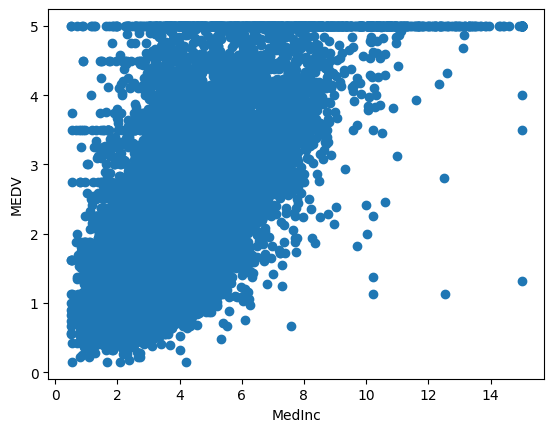

In [16]:
#DIAGRAMA DE DISPERSIÓN 

plt.scatter(df['MedInc'], df['MEDV'], marker='o') 
plt.xlabel('MedInc') 
plt.ylabel('MEDV') 

Text(0, 0.5, 'MEDV')

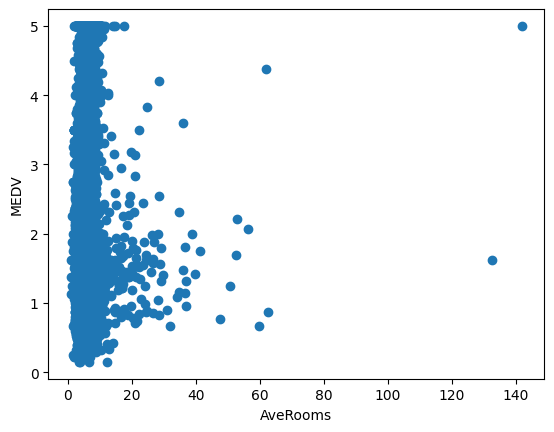

In [17]:
plt.scatter(df['AveRooms'], df['MEDV'], marker='o') 
plt.xlabel('AveRooms') 
plt.ylabel('MEDV')

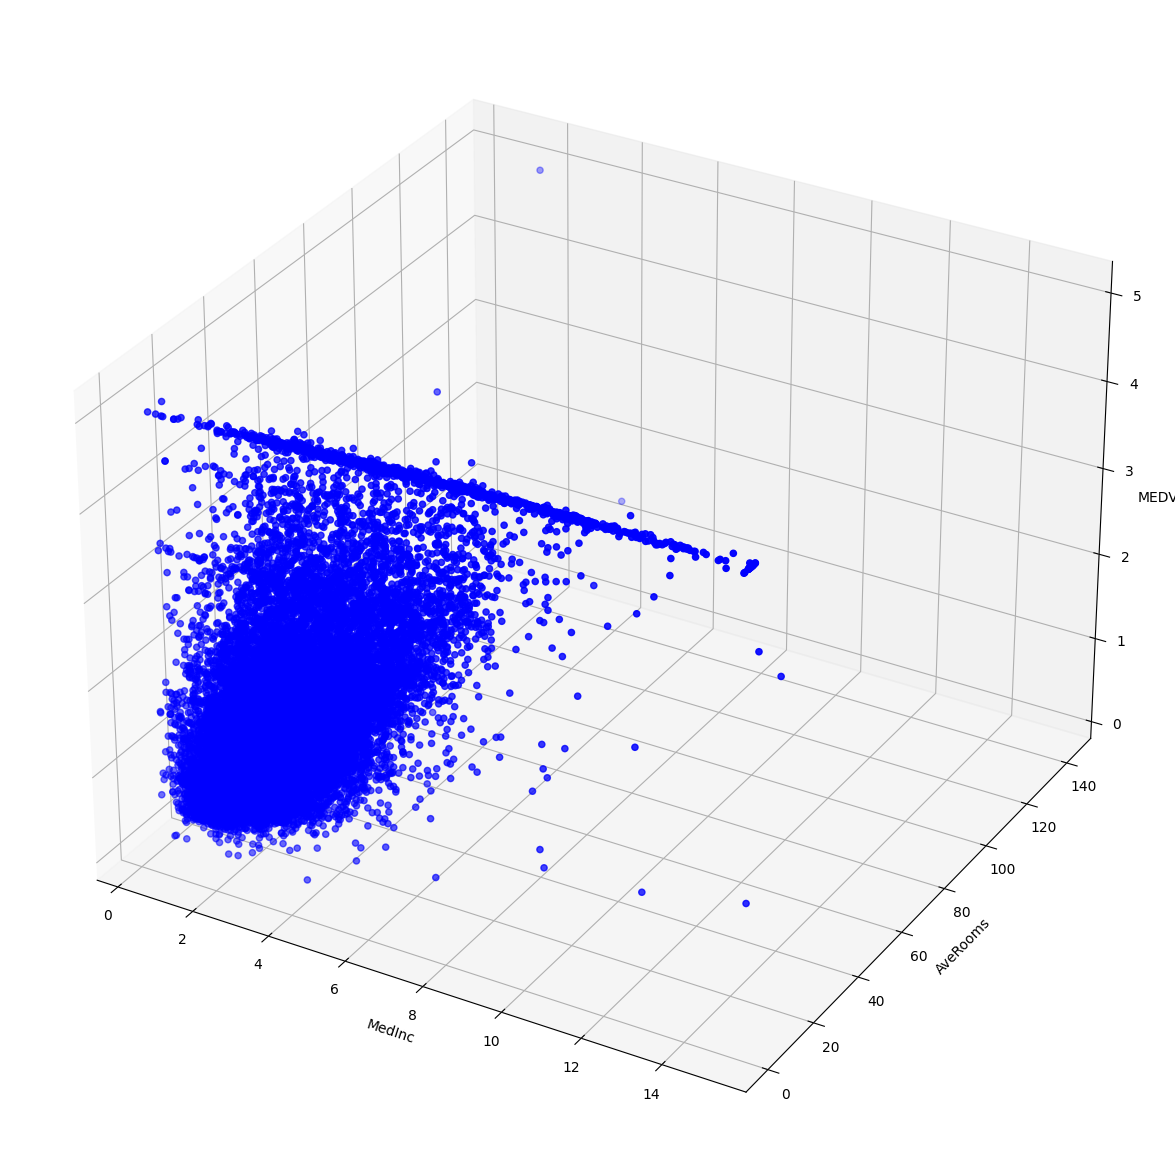

In [18]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(18,15)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(df['MedInc'], 
df['AveRooms'],
df['MEDV'], 
c='b') 
ax.set_xlabel("MedInc") 
ax.set_ylabel("AveRooms") 
ax.set_zlabel("MEDV") 
plt.show() 

**Entrenamiento del modelo**

creamos dos DataFrames: x e Y. El DataFrame x contendrá la combinación de las características MedInc y AveRooms, mientras que el DataFrame Y contendrá la etiqueta MEDV

In [21]:
x = pd.DataFrame(np.c_[df['MedInc'], df['AveRooms']], columns = ['MedInc','AveRooms']) 
Y = df['MEDV'] 

from sklearn.model_selection import train_test_split 
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

print(x_train.shape) 
print(Y_train.shape) 

(14448, 2)
(14448,)


In [22]:
print(x_test.shape) 
print(Y_test.shape) 

(6192, 2)
(6192,)


In [23]:
#Comenzar con el entrenamiento
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(x_train, Y_train) 

LinearRegression()

In [24]:
#Usar el conjunto de pruebas para hacer unas predicciones

price_pred = model.predict(x_test) 

In [25]:
#Conocer el rendimiento del modelo usando el método R-cuadrado
print('R-Squared: %.4f' % model.score(x_test, Y_test))

R-Squared: 0.4924


0.6919541480004132


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

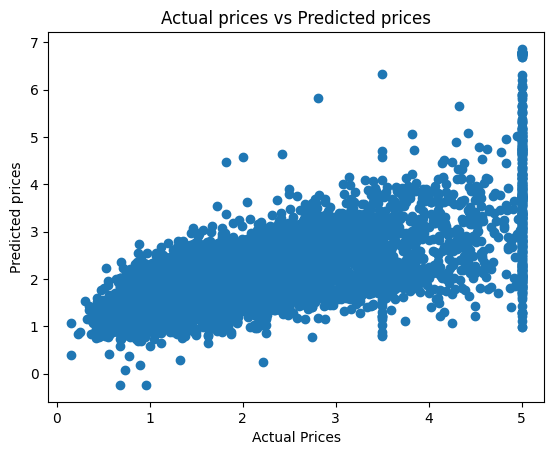

In [26]:
#diagrama de dispersión que muestra el precio real frente al precio previsto
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(Y_test, price_pred) 
print(mse) 
plt.scatter(Y_test, price_pred) 
plt.xlabel("Actual Prices") 
plt.ylabel("Predicted prices") 
plt.title("Actual prices vs Predicted prices")

**Obtención del punto de corte y los coeficientes**

La fórmula para la regresión múltiple es la siguiente: 
    
    Y = β0 + β0x1 + β0x2 
Donde Y es la variable dependiente, β0 es el punto de corte y β1 y β2 son los coeficientes de las dos características x1 y x2, respectivamente.

Con el modelo entrenado, podemos obtener el punto de corte y los coeficientes de las 
características

In [27]:
print(model.intercept_) 
print(model.coef_) 

0.567856466318923
[ 0.43191852 -0.03240486]


In [29]:
#usar el modelo para predecir el precio de la vivienda cuando MedInc es 6 y AveRooms es 7 
print(model.predict([[6, 7]])) 

[2.93253355]


C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
#verificar el valor predicho utilizando la fórmula anterior
#Y = β0 + β0x1 + β0x2 
y=0.5678564663189225 + 6 * 0.43191852 + 5 * -0.03240486
print(y)

2.997343286318922


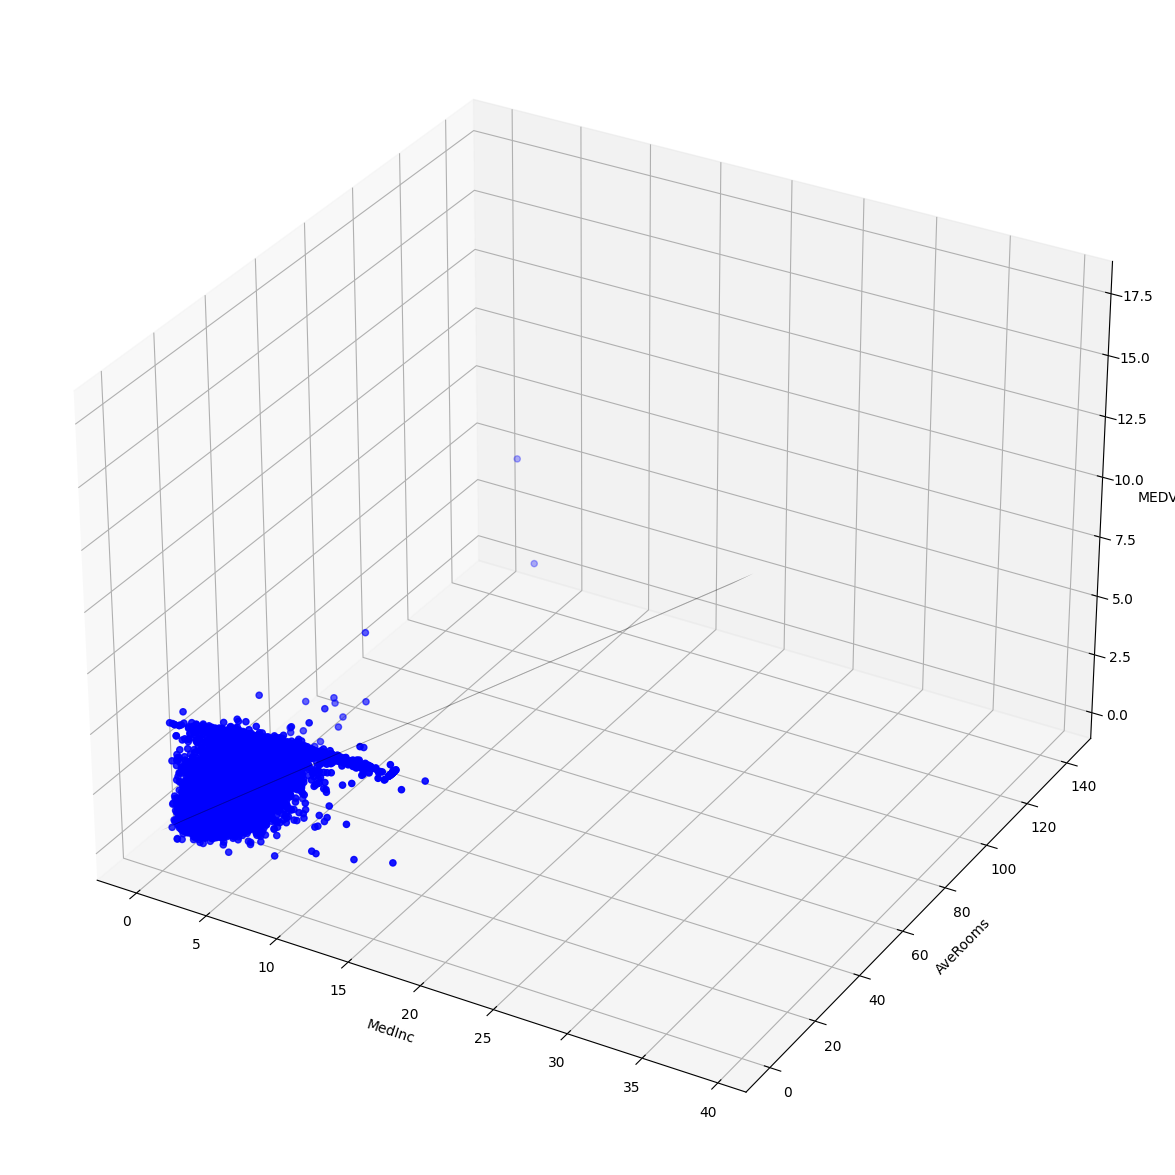

In [36]:
#hiperplano de regresión 3D que muestre las predicciones
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import fetch_california_housing # Import alternative dataset 

# dataset = load_boston() # Removed as it's deprecated 
dataset = fetch_california_housing() # Load the California housing dataset 
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) 
df['MEDV'] = dataset.target
x = pd.DataFrame(np.c_[df['MedInc'], df['AveRooms']], columns = ['MedInc','AveRooms']) 
Y = df['MEDV'] 
fig = plt.figure(figsize=(18,15)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x['MedInc'], 
x['AveRooms'], 
Y, 
c='b') 
ax.set_xlabel("MedInc") 
ax.set_ylabel("AveRooms") 
ax.set_zlabel("MEDV") 

#---create a meshgrid of all the values for LSTAT and RM--- 
x_surf = np.arange(0, 40, 1) #---for LSTAT--- 
y_surf = np.arange(0, 10, 1) #---for RM--- 
x_surf, y_surf = np.meshgrid(x_surf, y_surf) 

from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(x, Y) 

#---calculate z(MEDC) based on the model--- 
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y) 
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), 
rstride=1, 
cstride=1, 
color='None', 
alpha = 0.4) 
plt.show() 